# Forecasting the onset of diabetes

We will use the Pima_Indians dataset for this study which can be found [here](https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data).

In [1]:
# This is used to plot inline
%matplotlib inline

# Importing all the required modules
import pandas as pd
import numpy as np

# seaborn is a plotting library
import seaborn as sb
import matplotlib.pyplot as plt

# scikit learn for ml algorithms
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# To find the cross validation score
from sklearn.model_selection import cross_val_score

# To find the mean squared error and r2
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics

from sklearn.model_selection import train_test_split

In [2]:
# Suppress the warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
# path to the dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data'

# Importing the dataset using read_csv from pandas module
pima_df = pd.read_csv(url, header=None)

**Note:** 

- Several constraints are placed on the selection of these instances from a larger database.In particular, all patients here are females at least 21 years old of Pima Indian heritage.
- Missing Attribute Values: Yes
- Class value 1 is interpreted as "tested positive for diabetes"

In [4]:
# Find the shape of the dataset
pima_df.shape

(768, 9)

In [5]:
pima_df.head(2)

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


In [6]:
# Lets add names to the columns
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
pima_df.columns = names
pima_df.head(5)

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### Observations:

Clearly there are missing values represented by 0. For this primary analysis, I will use the dataset as is, without any replacement or deleting the missing values.

## Univariate Analysis

In [7]:
# Testing the spread of data
pima_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
preg,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
plas,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
pres,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
skin,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
test,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
mass,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
pedi,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
class,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


### Observations:

- The 2-Hour serum insulin test attribute has a large positive or right skew because the mean (79.79) is larger than median (30.5). This could be due to the presence of ouliers like max value which is 846.00.
- The Diastolic blood pressure has left skew, which can be infered from mean (69.11) which is less than median (72). This could be possible due to the presence of missing values, for instance the minimum value cannot be 0, that would mean the person is dead.


## Bivariate Analysis

Constructing Pearsons correlation heatmap using seaborn module.

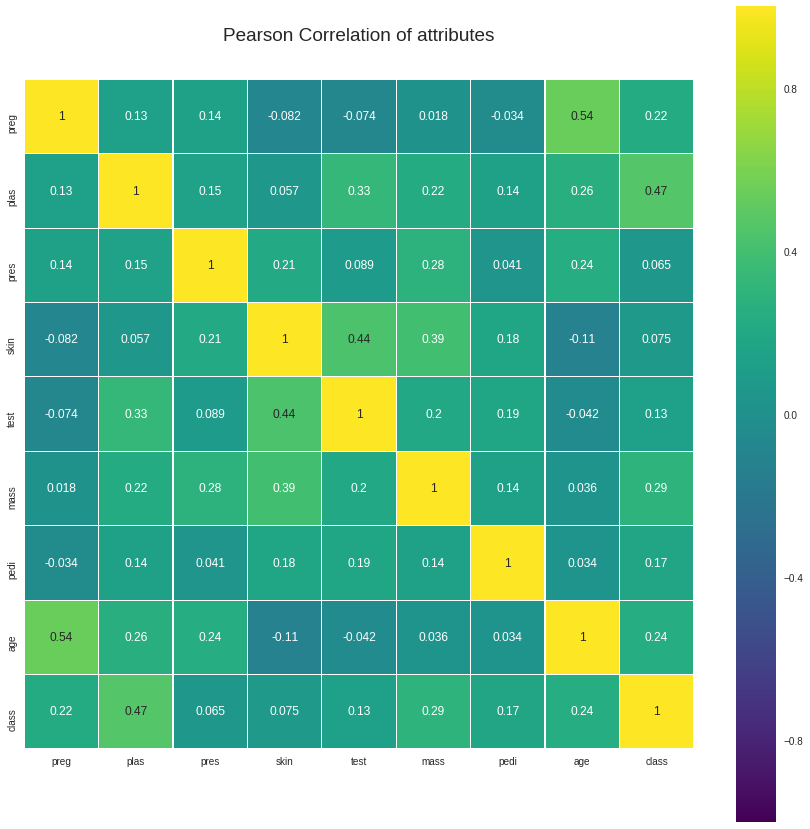

In [8]:
colormap = plt.cm.viridis # Color range to be used in heatmap
plt.figure(figsize=(15,15))
plt.title('Pearson Correlation of attributes', y=1.05, size=19)
sb.heatmap(pima_df.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

### Insights from the heatmap

- There is no strong correlation between independent attributes, so we can retain all the attributes for the analysis.
- Only plas(Plasma glucose concentration) has mild correlation to the target attribute class.

In [9]:
# Separate the independent attributes i.e. columns 0 to 7 and store them in X 
# Store the target column (column 8) into Y 

npArray = pima_df.values # numpy array
X = npArray[:,0:8] # select all rows and first 7 columns which are the attributes
Y = npArray[:,8]   # select all rows and the 8th column which is the classification 
                   # 0 for no diabeties and 1 for diabeties case
    
seed = 7  # Random number seeding for repeatability of the code

In [10]:
# Splitting the data into test and train in the ratio 70:30
# Note: If the data is sorted, the is a risk of bias in this method of splitting, better use random split.
xTrain = X[:538]
xTest = X[538:]

yTrain = Y[:538]
yTest = Y[538:]


In [11]:
# Creating a entropy based decision tree classifier
dtModel = DecisionTreeClassifier(criterion = 'entropy', random_state=seed)

In [12]:
# Fitting the train set to this model
dtModel.fit(xTrain, yTrain)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=7, splitter='best')

In [13]:
# Finding the score 
dtModel.score(xTest, yTest)

0.66521739130434787

This model has **scored 66.52%**

In [14]:
# Making predictions
expected = yTest
predicted = dtModel.predict(xTest)

print(metrics.confusion_matrix(expected, predicted))

[[108  43]
 [ 34  45]]


From the confusion matrix, we see that there are 108 true positives and 45 true negatives.

### Split dataset using random function

We would get a different result if we split the dataset randomly in ratio 70:30.

In [15]:
test_size = 0.30 # taking 70:30 training and test set
seed = 2  # Random numbmer seeding for reapeatability of the code

xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [16]:
# Fitting the train set to this model
dtModel.fit(xTrain, yTrain)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=7, splitter='best')

In [17]:
# Finding the score 
dtModel.score(xTest, yTest)

0.67532467532467533

You can clearly see that the accuracy score has changed from 66.52% to 67.53%.

#### Using regularization techniques

In [18]:
# Using max_depth of 9 and min_samples_leaf=5
dtModel = DecisionTreeClassifier(criterion = 'entropy', max_depth = 9, min_samples_leaf=5)
dtModel.fit(xTrain, yTrain)
# Finding the score 
dtModel.score(xTest, yTest)

0.7056277056277056

In [19]:
# Using max_depth=5 and min_samples_leaf=5
dtModel = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5, min_samples_leaf=5)
dtModel.fit(xTrain, yTrain)
# Finding the score 
dtModel.score(xTest, yTest)

0.74025974025974028

In [20]:
# Using max_depth=3 and min_samples_leaf=5
dtModel = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, min_samples_leaf=5)
dtModel.fit(xTrain, yTrain)
# Finding the score 
dtModel.score(xTest, yTest)

0.76190476190476186

In [21]:
# Using max_depth=3 and min_samples_leaf=5
dtModel = DecisionTreeClassifier(criterion = 'entropy', max_depth = 1, min_samples_leaf=5)
dtModel.fit(xTrain, yTrain)
# Finding the score 
dtModel.score(xTest, yTest)

0.74025974025974028

#### Observations

We can see that maximum score can be achieved using regularization of max_dept = 3.

### Random Forest classifier

In [22]:
# Initializing and fitting the model
rfcl = RandomForestClassifier(random_state=seed)
rfcl.fit(xTrain, yTrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=2,
            verbose=0, warm_start=False)

In [23]:
# Accuracy of model
rfcl.score(xTest, yTest)

0.77056277056277056

#### Observations

Random Forest classifier has given us an accuracy of **77.05%** which is more than Decision tree classifier.

In [24]:
# Initializing and fitting the model
rfcl = RandomForestClassifier(n_estimators=3, max_depth=5, random_state=seed)
rfcl.fit(xTrain, yTrain)
# Accuracy of model
rfcl.score(xTest, yTest)

0.72727272727272729

In [25]:
# Initializing and fitting the model
rfcl = RandomForestClassifier(n_estimators=24, max_depth=3, random_state=seed)
rfcl.fit(xTrain, yTrain)
# Accuracy of model
rfcl.score(xTest, yTest)

0.79220779220779225

### Observations

The optimal number of trees that gives the best result is 24 trees with a max depth of 3.

### Using grid search cross validation

In [26]:
# Using grid search cross validation
from sklearn.grid_search import GridSearchCV


rfc = RandomForestClassifier(n_estimators=50, max_depth=5, random_state=seed) 

param_grid = { 
    'n_estimators': list(range(20, 50)),
    'max_depth': list(range(3, 13, 2))
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, verbose=1)

# Using cross validation
CV_rfc.fit(X, Y)
print(CV_rfc.best_params_)
print(CV_rfc.best_estimator_)
print(CV_rfc.best_score_)

Fitting 5 folds for each of 150 candidates, totalling 750 fits
{'max_depth': 11, 'n_estimators': 46}
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=11, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=46, n_jobs=1, oob_score=False, random_state=2,
            verbose=0, warm_start=False)
0.7799479166666666


[Parallel(n_jobs=1)]: Done 750 out of 750 | elapsed:   45.1s finished


### Observations

The optimal value for number of trees is 46 at maximum depth of 11 for each tree. 